In [0]:
from google.colab import drive
drive.mount('/content/drive/')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
cd '/content/drive/My Drive/CSCE_689/'


/content/drive/.shortcut-targets-by-id/188Eba_cLfN68Gy_4d0czpAJtiCmTs8jW/CSCE_689


In [0]:
# Load input files from  
import numpy as np
import pandas as pd
labels=pd.read_csv('combinedlabels.csv')
features=pd.read_csv('Features_final.csv',header=None)

In [0]:
features.shape

(56022, 5)

In [0]:
labels

,Unnamed: 0,label,timestamp
0,0,0,0.00
1,1,0,0.05
2,2,0,0.10
3,3,0,0.15
4,4,0,0.20
...,...,...,...
56017,56017,100,17.95
56018,56018,100,18.00
56019,56019,100,18.05
56020,56020,100,18.10


In [0]:
#Contains value for all 100 videos and all frames.Need to filter out to assigning it to individual frame
label=np.load("labels.npy")
timesta=np.load("time.npy")
vid=np.load("vid.npy")

In [0]:
labels

,Unnamed: 0,label,timestamp
0,0,0,0.00
1,1,0,0.05
2,2,0,0.10
3,3,0,0.15
4,4,0,0.20
...,...,...,...
56017,56017,100,17.95
56018,56018,100,18.00
56019,56019,100,18.05
56020,56020,100,18.10


In [0]:
dfdf=pd.DataFrame()
dfdf['label']=vid
dfdf['timestamp']=timesta
dfdf['value']=label
dfdf.shape

(69392, 3)

In [0]:
# Merging to get the marked label(0 for normal, 1 for yawning) for each frame that has landmarks
merge1=pd.DataFrame()
merge1['merge']=dfdf["label"].astype(str) +"_"+ dfdf["timestamp"].astype(str)
merge1['label']=dfdf["value"]
merge2=pd.DataFrame()
merge2['merge']=labels["label"].astype(str) +"_"+ labels["timestamp"].astype(str)

In [0]:
merge2.merge(merge1, 'left',on='merge')['label']

0        0
1        0
2        0
3        0
4        0
        ..
56017    0
56018    0
56019    0
56020    0
56021    0
Name: label, Length: 56022, dtype: int64

In [0]:
labels[labels['label']==80]

,Unnamed: 0,label,timestamp
53071,53071,80,0.00
53072,53072,80,0.05
53073,53073,80,0.10
53074,53074,80,0.15
53075,53075,80,0.20
...,...,...,...
53508,53508,80,25.20
53509,53509,80,25.25
53510,53510,80,25.30
53511,53511,80,25.35


In [0]:
df_features=pd.DataFrame.from_records(features)
df_features["Y"]=merge2.merge(merge1, 'left',on='merge')['label']

In [0]:
df_features['label']=labels.iloc[:,1]
df_features

,0,1,2,3,4,Y,label
0,0.216,0.460,0.383,2.13,1.20,0,0
1,0.209,0.606,0.435,2.90,1.16,0,0
2,0.189,0.630,0.383,3.33,1.14,0,0
3,0.231,0.667,0.426,2.88,1.15,0,0
4,0.262,0.758,0.414,2.90,1.14,0,0
...,...,...,...,...,...,...,...
56017,0.238,0.556,0.406,2.34,1.24,0,100
56018,0.256,0.568,0.378,2.22,1.24,0,100
56019,0.238,0.556,0.384,2.33,1.24,0,100
56020,0.250,0.536,0.325,2.15,1.24,0,100


In [0]:
#Get mean and standard deviation
feature_mean=df_features[df_features['Y']==0].groupby('label').mean()
feature_std=df_features[df_features['Y']==0].groupby('label').std()

In [0]:
## Normalize the dataframe with mean and standard deviation and add to the input feature
df_normalised=df_features.apply(lambda x: (x[0:5]-feature_mean.loc[x['label']])/feature_std.loc[x['label']],axis=1)
# df_normalised.head()

In [0]:
df=pd.merge(df_normalised,df_features,left_index=True,right_index=True)
# df=df_features
df.head()

,0_x,1_x,2_x,3_x,4_x,Y_x,0_y,1_y,2_y,3_y,4_y,Y_y,label
0,0.792468,-0.644604,0.869393,-0.762955,0.151650,NaN,0.216,0.460,0.383,2.13,1.20,0,0
1,0.704539,0.328683,1.536111,-0.562682,-0.658592,NaN,0.209,0.606,0.435,2.90,1.16,0,0
2,0.453311,0.488675,0.869393,-0.450841,-1.063713,NaN,0.189,0.630,0.383,3.33,1.14,0,0
3,0.980889,0.735330,1.420717,-0.567884,-0.861153,NaN,0.231,0.667,0.426,2.88,1.15,0,0
4,1.370292,1.341968,1.266859,-0.562682,-1.063713,NaN,0.262,0.758,0.414,2.90,1.14,0,0


In [0]:
df['label']=merge2.merge(merge1, 'left',on='merge')['label']
df['timestamp']=labels.iloc[:,2]
df['video_label']=labels.iloc[:,1]
df=df.drop(['Y_y', 'Y_x'],axis=1) # 8 inputs
# df=df[:-1]

In [0]:
## Train-validation split
# train_percentage = 20/24
train_index = 53070
test_index = int(df.shape[0])-53070

In [0]:
df.to_numpy().reshape(int(df.shape[0]/2),2,13)
# df[:-1].shape

array([[[ 7.92468266e-01, -6.44603805e-01,  8.69393183e-01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 7.04538641e-01,  3.28683060e-01,  1.53611079e+00, ...,
          0.00000000e+00,  5.00000000e-02,  0.00000000e+00]],

       [[ 4.53311140e-01,  4.88675421e-01,  8.69393183e-01, ...,
          0.00000000e+00,  1.00000000e-01,  0.00000000e+00],
        [ 9.80888891e-01,  7.35330311e-01,  1.42071736e+00, ...,
          0.00000000e+00,  1.50000000e-01,  0.00000000e+00]],

       [[ 1.37029152e+00,  1.34196801e+00,  1.26685945e+00, ...,
          0.00000000e+00,  2.00000000e-01,  0.00000000e+00],
        [ 1.26715390e-01, -7.84597121e-01, -3.87113084e-01, ...,
          0.00000000e+00,  2.50000000e-01,  0.00000000e+00]],

       ...,

       [[-6.75524285e-01,  2.18101004e+00, -1.04012193e+00, ...,
          0.00000000e+00,  1.79000000e+01,  1.00000000e+02],
        [-6.58047774e-01,  1.43481645e+00,  1.65079800e-01, ...,
          0.00000000e+00,  1.79500

In [0]:
df_train = df[:train_index]
df_test = df[-test_index:]

In [0]:
x_test = df_test.drop(["label","timestamp","video_label"],axis=1)
y_test = df_test["label"]
test_timestamp=df_test["timestamp"]
test_video_label=df_test["video_label"]

In [0]:
x_train = df_train.drop(['label',"timestamp","video_label"],axis=1)
y_train = df_train['label']
train_timestamp=df_train["timestamp"]
train_video_label=df_train["video_label"]
np.where(np.asanyarray(np.isnan(x_train)))


(array([], dtype=int64), array([], dtype=int64))

In [0]:
x_train.shape

(53070, 10)

In [0]:

x_test.shape

(2952, 10)

In [0]:
import numpy as np
shape=1
x_shaped_train  = np.array(x_train).reshape(int(x_train.shape[0]/shape),10)
x_shaped_test  = np.array(x_test).reshape(int(x_test.shape[0]/shape),10)

In [0]:
x_shaped_train.shape

(53070, 10)

In [0]:
y_train = np.array(y_train).astype('float')
y_test = np.array(y_test).astype('float')
# y_test=y_test[:-1]
y_shaped_train  = []
for i in range(0, len(y_train), shape):
  y_shaped_train.append(y_train[i])
print(len(y_shaped_train))

y_shaped_test  = []
for i in range(0, len(y_test), shape):
  y_shaped_test.append(y_test[i])
print(len(y_shaped_test))

53070
2952


In [0]:
y_shaped_train = np.array(y_shaped_train)
y_shaped_train.shape

(53070,)

In [0]:
y_shaped_test = np.array(y_shaped_test)
y_shaped_test.shape

(2952,)

In [0]:
x_shaped_test.shape

(2952, 10)

In [0]:
np.save("x_train.npy",x_shaped_train)
np.save("y_train.npy",y_shaped_train)
np.save("x_test.npy",x_shaped_test)
np.save("y_test.npy",y_shaped_test)

In [0]:
!pip install talos

     |████████████████████████████████| 61kB 7.0MB/s 
     |████████████████████████████████| 8.7MB 23.3MB/s 
     |████████████████████████████████| 378kB 48.8MB/s 
     |████████████████████████████████| 109.2MB 54kB/s 
     |████████████████████████████████| 26.6MB 121kB/s 
     |████████████████████████████████| 839kB 46.6MB/s 
     |████████████████████████████████| 491kB 44.4MB/s 
     |████████████████████████████████| 3.2MB 37.3MB/s 
  Created wheel for wrangle: filename=wrangle-0.6.7-cp36-none-any.whl size=49894 sha256=567353fefa0084fddf07fd2127037b3edd97906919f02e6b07d8556cd139f21d
  Stored in directory: /root/.cache/pip/wheels/bf/1b/50/d0403ce6ef269e364894da7b50db68db14c4ac62c577561e2d
  Created wheel for chances: filename=chances-0.1.9-cp36-none-any.whl size=41609 sha256=a35e3d9f9ca0444e440c46493dad0b6e3eafc11eab81c30d51f859a771f75066
  Stored in directory: /root/.cache/pip/wheels/75/33/46/c871b94249bd57d17797d049b3dff8e3a09c315afb67eb14c6
  Created wheel for kerasplotlib: 

In [0]:
# %tensorflow_version 1.14.
import numpy as np
# from keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Dropout, Bidirectional, LSTM,Reshape,RepeatVector

# from tensorflow.keras.layers.recurrent import LSTM
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.python.keras.layers.wrappers import TimeDistributed
# from tensorflow.keras.layers.convolutional import (Conv2D, MaxPooling3D, Conv3D,
    # MaxPooling2D)
from collections import deque
import sys
from tensorflow.keras.utils import plot_model
import keras
from IPython.display import clear_output
from tensorflow.keras import losses
from tensorflow.keras.callbacks import LearningRateScheduler

import tensorflow.keras.backend as K
# from keras_self_attention import SeqSelfAttention
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import numpy
# import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import talos

In [0]:
# then we can go ahead and set the parameter space
p = {'first_neuron':[128],
     'batch_size': [128,512],
     'dropout': [0.5],
     'kernel_initializer': ['uniform'],
     'learning_rate':[0.0001,0.00001],
     'class weight':[0.5,1,1.5]}

In [0]:
## Define Model
def create_model(x_train, y_train, x_val, y_val, params):
  model = Sequential()
  model.add(Dense(int(params['first_neuron']), activation='sigmoid',kernel_initializer=params['kernel_initializer'],input_shape=(10,)))
  model.add(RepeatVector(10))
  model.add((LSTM(int(params['first_neuron']/2), return_sequences=True,input_shape=(2,10,),dropout=params['dropout'])))
  model.add(Flatten())
  model.add(Dense(int(params['first_neuron']/4), activation='relu',kernel_initializer=params['kernel_initializer'])) #FC2
  model.add(Dropout(params['dropout']))
  model.add(Dense(int(params['first_neuron']/16), activation='tanh',kernel_initializer=params['kernel_initializer']))#FC3
  model.add(Dropout(params['dropout']))
  model.add(Dense(1, activation='sigmoid'))#Output Layer
  optimizer = Adam(lr=params['learning_rate'])
  metrics = ['accuracy']
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=metrics)
  history=model.fit(x_train, y_train,epochs=250, batch_size=params['batch_size'], validation_data = (x_val,y_val),class_weight={0:1,1:params['class weight']},
             callbacks=[talos.utils.ExperimentLogCallback('best_model', params)],verbose=0)
  return history, model



In [0]:
## Hyperparameter scanning
# import talos
t = talos.Scan(x=x_shaped_train,
               y=y_shaped_train,
               model=create_model,
               params=p,
               experiment_name='best_model',
               round_limit=10)

  0%|          | 0/10 [00:00<?, ?it/s]

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


100%|██████████| 10/10 [4:11:45<00:00, 1510.50s/it]


In [0]:
# use Scan object as input
analyze_object = talos.Analyze(t)

In [0]:
# access the dataframe with the results
analyze_object.data

,round_epochs,loss,acc,val_loss,val_acc,batch_size,class weight,dropout,first_neuron,kernel_initializer,learning_rate
0,250,0.609104,0.801529,0.477670,0.800327,128,1.5,0.5,128,uniform,0.00001
1,250,0.278270,0.817142,0.455225,0.820363,512,0.5,0.5,128,uniform,0.00010
2,250,0.313471,0.802121,0.505129,0.800075,128,0.5,0.5,128,uniform,0.00001
3,250,0.481946,0.803413,0.469231,0.804535,128,1.0,0.5,128,uniform,0.00001
4,250,0.436193,0.821530,0.424806,0.825011,512,1.0,0.5,128,uniform,0.00010
5,250,0.268671,0.820964,0.442039,0.822310,128,0.5,0.5,128,uniform,0.00010
6,250,0.538212,0.827371,0.417332,0.830475,128,1.5,0.5,128,uniform,0.00010
7,250,0.497908,0.801771,0.482170,0.800013,512,1.0,0.5,128,uniform,0.00001
8,250,0.420228,0.827425,0.409001,0.831041,128,1.0,0.5,128,uniform,0.00010
9,250,0.630489,0.799322,0.491936,0.799761,512,1.5,0.5,128,uniform,0.00001


In [0]:
# get the highest result for any metric
analyze_object.high('val_acc')

0.8310407400131226

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


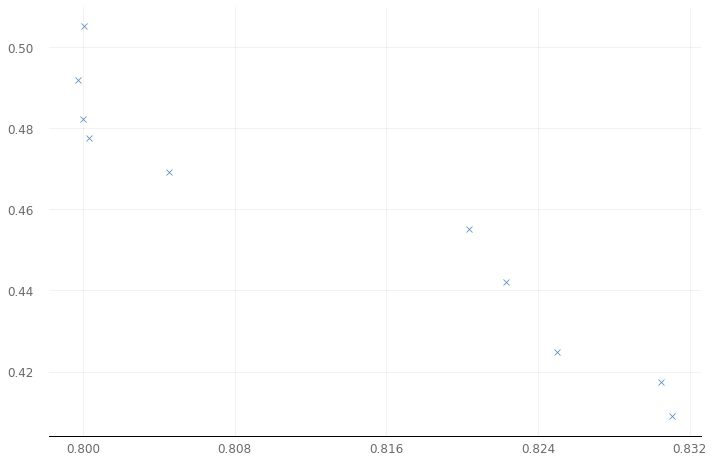

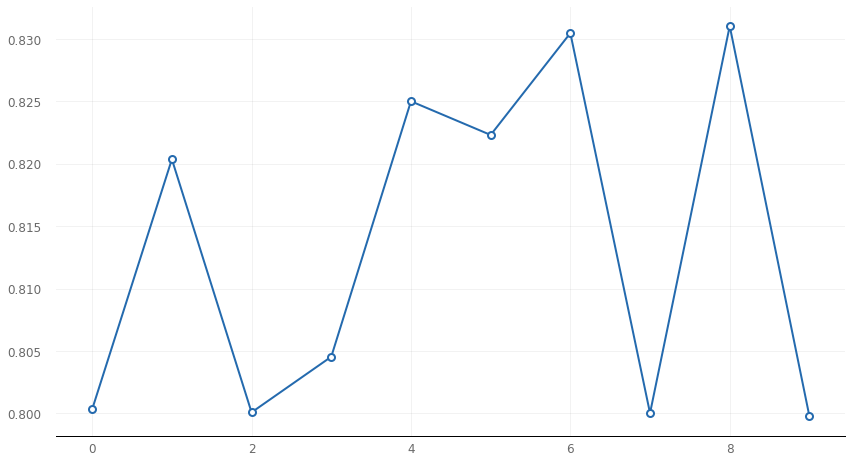

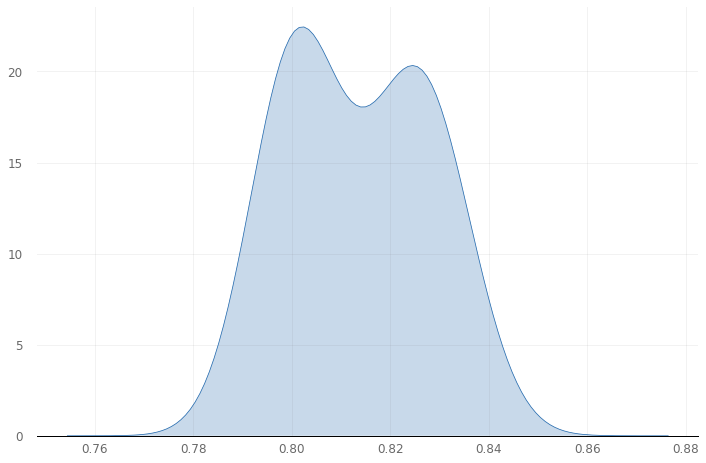

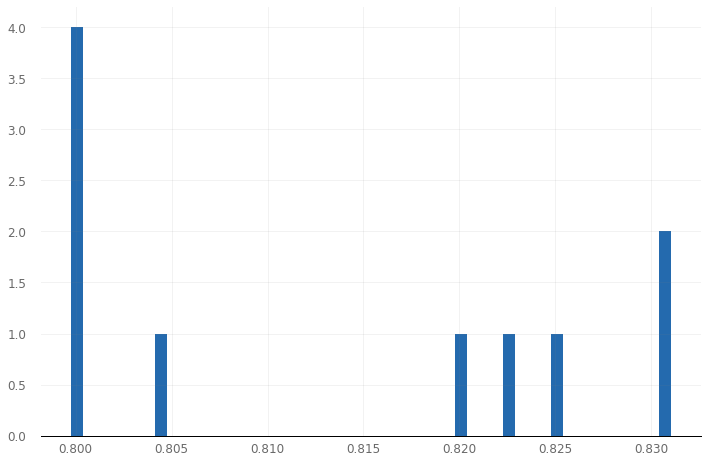

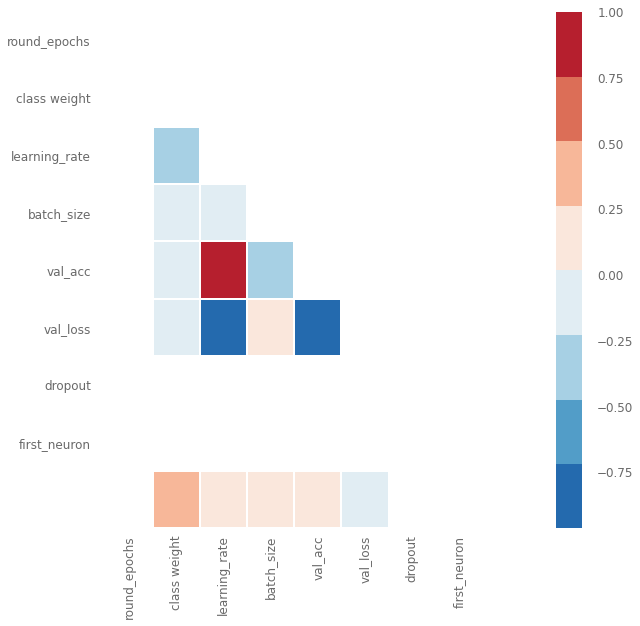

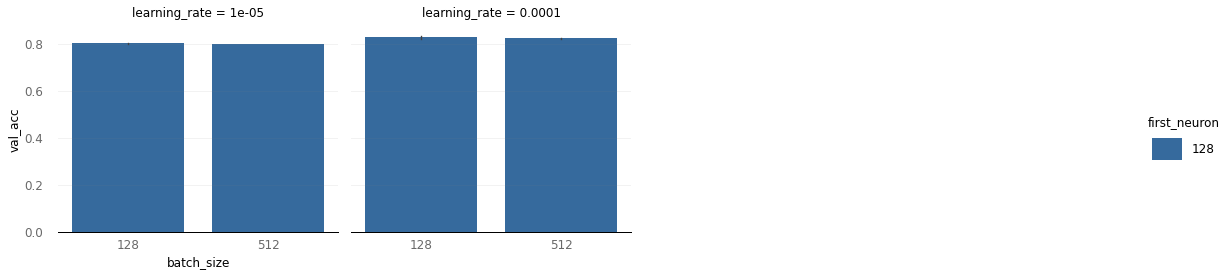

In [0]:
# a regression plot for two dimensions 
analyze_object.plot_regs('val_acc', 'val_loss')

# line plot
analyze_object.plot_line('val_acc')

# up to two dimensional kernel density estimator
analyze_object.plot_kde('val_acc')

# a simple histogram
analyze_object.plot_hist('val_acc', bins=50)

# heatmap correlation
analyze_object.plot_corr('val_loss', ['acc', 'loss', 'val_loss'])

# a four dimensional bar grid
analyze_object.plot_bars('batch_size', 'val_acc', 'first_neuron', 'learning_rate')

In [0]:
# get the name of the experiment log (Last .csv file)
!ls -lhtr best_model

total 1.8M
-rw------- 1 root root    0 Mar 31 17:08 033120170841.csv
-rw------- 1 root root 1021 Mar 31 17:24 033120170922.csv
-rw------- 1 root root 196K Mar 31 18:17 033120170922.log
-rw------- 1 root root 1020 Mar 31 19:20 033120183507.csv
-rw------- 1 root root 270K Mar 31 23:54 033120183507.log
-rw------- 1 root root    0 Apr 13 22:39 041320223909.csv
-rw------- 1 root root    0 Apr 13 22:39 041320223918.csv
-rw------- 1 root root 1.1K Apr 13 23:29 041320224635.csv
-rw------- 1 root root 221K Apr 14 02:09 041320224635.log
-rw------- 1 root root 123K Apr 14 03:31 041420030642.log
-rw------- 1 root root 1.1K Apr 14 03:31 041420030642.csv
-rw------- 1 root root 1.1K Apr 14 04:39 041420041730.csv
-rw------- 1 root root 196K Apr 14 05:42 041420041730.log
-rw------- 1 root root 1.1K Apr 16 00:39 041620002629.csv
-rw------- 1 root root 208K Apr 16 03:43 041620002629.log
-rw------- 1 root root    0 Apr 16 05:04 041620050432.csv
-rw------- 1 root root    0 Apr 16 05:04 041620050448.csv
-rw

In [0]:
from talos.utils.recover_best_model import recover_best_model

results, models = recover_best_model(x_train=x_shaped_train,
                                     y_train=y_shaped_train.reshape(-1,1),
                                     x_val=x_shaped_test,
                                     y_val=y_shaped_test.reshape(-1,1),
                                     experiment_log='best_model/042620181528.csv', ## Use the name obtained from above
                                     input_model=create_model,
                                     n_models=5,
                                     task='multi_label')

In [0]:
## Top performing models
results

,round_epochs,loss,acc,val_loss,val_acc,batch_size,class weight,dropout,first_neuron,kernel_initializer,learning_rate,crossval_mean_f1score
8,250,0.420228,0.827425,0.409001,0.831041,128,1.0,0.5,128,uniform,0.0001,1.0
6,250,0.538212,0.827371,0.417332,0.830475,128,1.5,0.5,128,uniform,0.0001,1.0
4,250,0.436193,0.821530,0.424806,0.825011,512,1.0,0.5,128,uniform,0.0001,1.0
5,250,0.268671,0.820964,0.442039,0.822310,128,0.5,0.5,128,uniform,0.0001,1.0
1,250,0.278270,0.817142,0.455225,0.820363,512,0.5,0.5,128,uniform,0.0001,1.0


In [0]:
## Best Model
model=models[0]

In [0]:
params=dict(results.iloc[0,:])
history,model=create_model(x_shaped_train,y_shaped_train,x_shaped_test,y_shaped_test,params)

In [0]:
params

{'acc': 0.8274246999999999,
 'batch_size': 128,
 'class weight': 1.0,
 'crossval_mean_f1score': 1.0,
 'dropout': 0.5,
 'first_neuron': 128,
 'kernel_initializer': 'uniform',
 'learning_rate': 0.0001,
 'loss': 0.4202276492897648,
 'round_epochs': 250,
 'val_acc': 0.83104074,
 'val_loss': 0.4090012429789468}

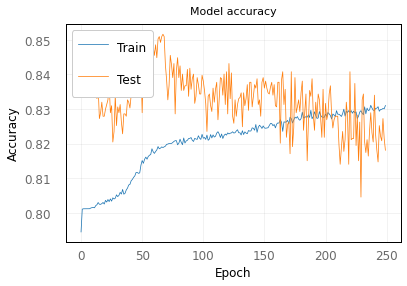

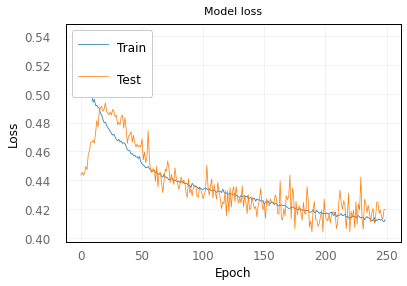

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
## Prediction, Accuracy, F1-score, ROC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

pred_rnn = model.predict_classes(x_shaped_test)
y_score_10 = model.predict_proba(x_shaped_test)
acc10 = accuracy_score(y_shaped_test, pred_rnn)
f1_score_10 = metrics.f1_score(y_shaped_test, np.array(pred_rnn),average='micro')
roc_10 = metrics.roc_auc_score(y_shaped_test, y_score_10)
print([acc10, f1_score_10, roc_10])
print(confusion_matrix(y_shaped_test, pred_rnn))

[0.818089430894309, 0.8180894308943089, 0.7266455602065317]
[[2236  241]
 [ 296  179]]


In [0]:
len(pred_rnn.astype('int'))

2952

In [0]:
## Plotting time-label graph for each of the validation videos
plot_df=pd.DataFrame()
plot_df["label"]=test_video_label
plot_df["time"]=test_timestamp
plot_df["pred"]=pred_rnn #pred

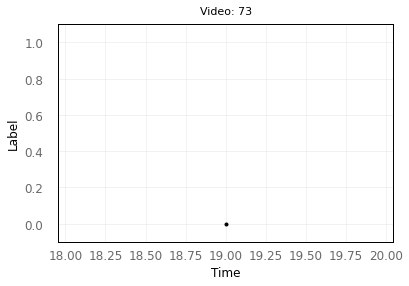

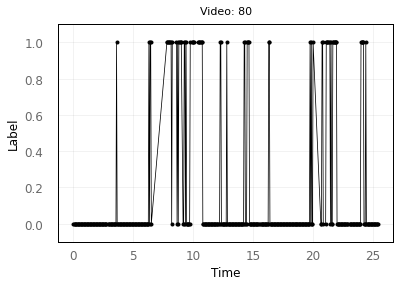

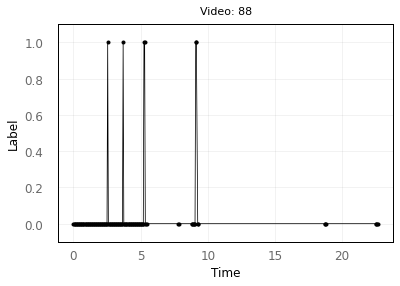

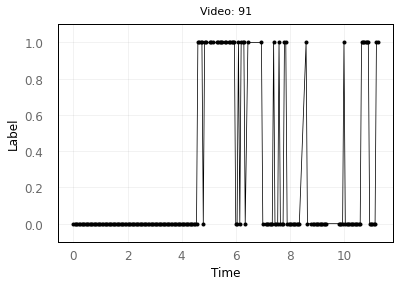

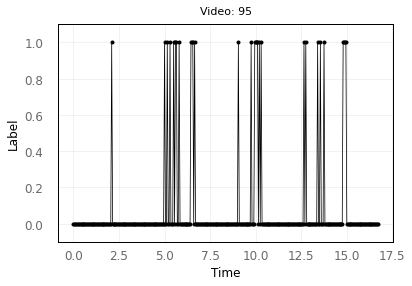

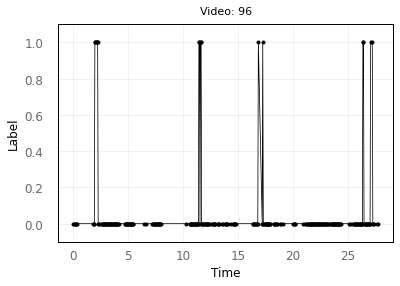

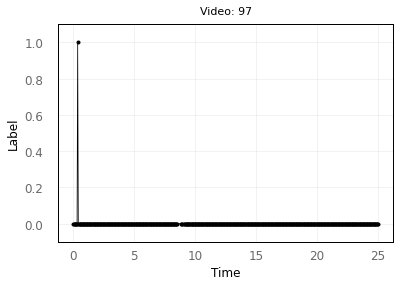

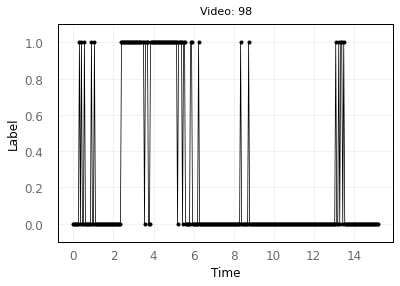

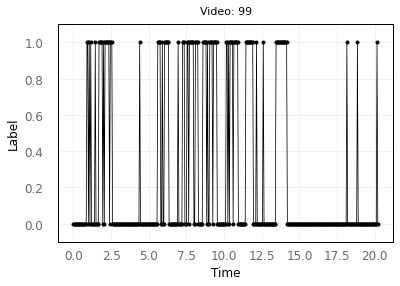

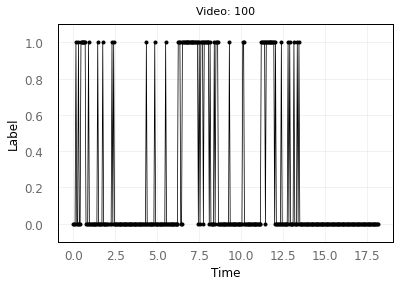

In [0]:
listed=(list(plot_df.groupby("label")))
for i in listed:
    fig = plt.figure()
    plt.plot(i[1].loc[:,'time'],i[1].loc[:,'pred'],marker = '.', color = "Black")
    plt.title("Video: "+str(i[0]))
    plt.xlabel("Time")
    plt.ylabel("Label")
    plt.ylim(-0.1,1.1)
    plt.show()
    json_save=i[1].iloc[:,1:2]
    # json_save.to_json('timeLabel: ' +str(i[0])+ ".json")
  

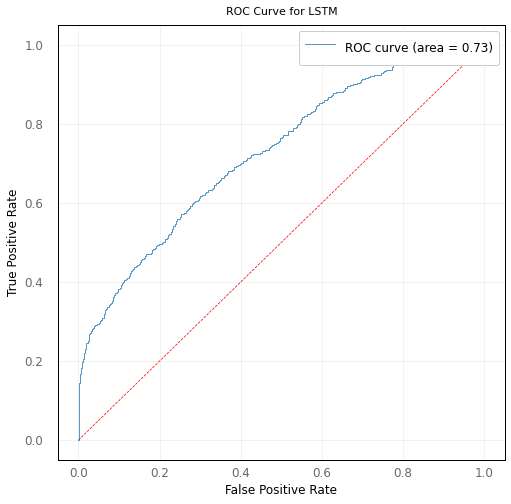

In [0]:
## Check ROC for the data
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.plot([0, 1], [0, 1],'r--')
fpr, tpr, thresholds = roc_curve(y_shaped_test, y_score_10)
plt.plot(fpr, tpr, label= 'ROC curve (area = %0.2f)' % roc_10)
plt.title('ROC Curve for LSTM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

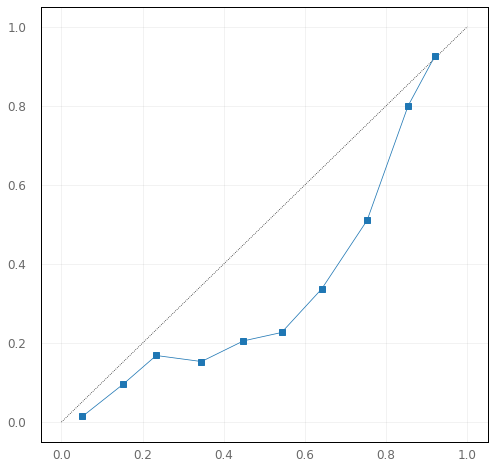

In [0]:
## Calibration curve
from sklearn.calibration import calibration_curve
plt.figure(figsize=(8,8))
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
fraction_of_positives, mean_predicted_value=calibration_curve(y_shaped_test,y_score_10,n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives,"s-",
                 label="%s" % 'LSTM')

In [0]:
# serialize weights to HDF5
model.save("model.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
model=load_model('model.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 128)               1408      
_________________________________________________________________
repeat_vector_6 (RepeatVecto (None, 10, 128)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 10, 64)            49408     
_________________________________________________________________
flatten_6 (Flatten)          (None, 640)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 32)                20512     
_________________________________________________________________
dropout_12 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 8)                

In [0]:
#Save Probabilities
np.save("NN_test.npy",y_score_10)
Y_score_train= model.predict_proba(x_shaped_train)
np.save("NN_train.npy",Y_score_train)